# Test PDPbox with multiclass classification problem
## Kaggle Otto Group with RandomForest
This demo is based on **Otto Group Product Classification Challenge**  
https://www.kaggle.com/c/otto-group-product-classification-challenge

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
import sys
sys.path.insert(0, '../../')

from pdpbox import pdp, get_dataset

## get dataset

In [3]:
test_otto = get_dataset.otto()
test_otto.keys()

['data', 'features', 'rf_model', 'target']

In [4]:
otto_data = test_otto['data']
otto_features = test_otto['features']
otto_model = test_otto['rf_model']
otto_target = test_otto['target']

## test pdp isolate

In [5]:
%%time 
pdp_feat_67_rf = pdp.pdp_isolate(model=otto_model, 
                                 dataset=otto_data,
                                 model_features=otto_features,
                                 feature='feat_67')

Wall time: 8.52 s


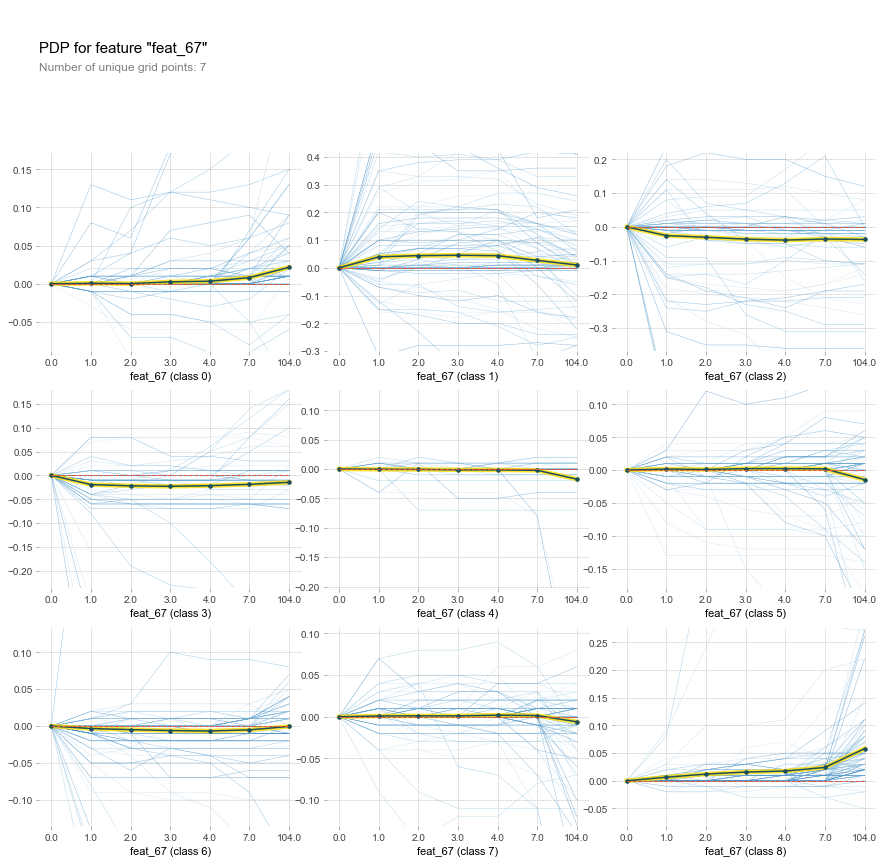

In [6]:
fig, axes = pdp.pdp_plot(pdp_feat_67_rf, 'feat_67', center=True, x_quantile=True, ncols=3, plot_lines=True, frac_to_plot=100)

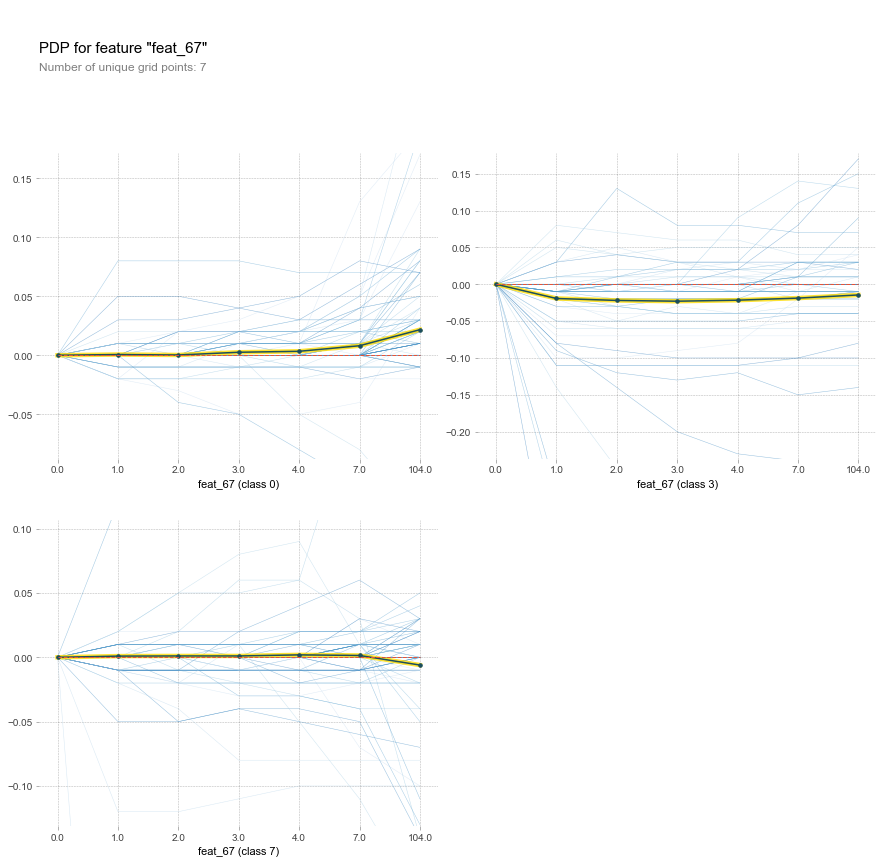

In [7]:
fig, axes = pdp.pdp_plot(pdp_feat_67_rf, 'feat_67', center=True, x_quantile=True, ncols=2, 
                         plot_lines=True, frac_to_plot=100, which_classes=[0, 3, 7])

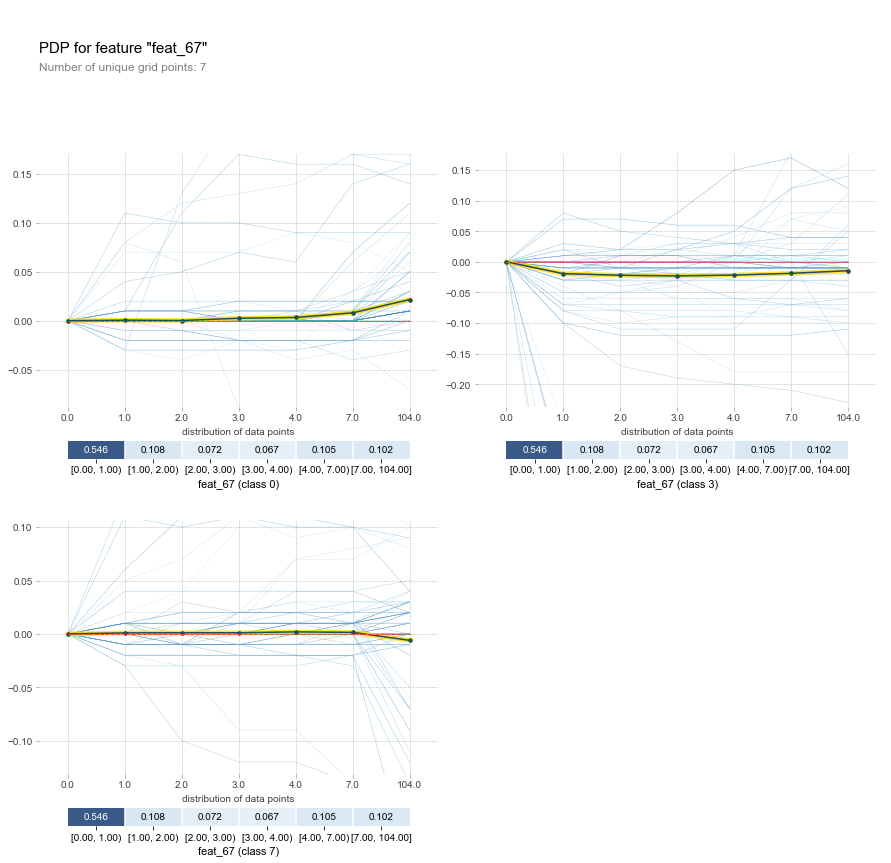

In [8]:
fig, axes = pdp.pdp_plot(pdp_feat_67_rf, 'feat_67', center=True, x_quantile=True, ncols=2, 
                         plot_lines=True, frac_to_plot=100, which_classes=[0, 3, 7], plot_pts_dist=True)

### interaction between feat_67 and feat_24

In [5]:
%%time
pdp_67_24_rf = pdp.pdp_interact(model=otto_model, 
                                dataset=otto_data, 
                                model_features=otto_features, 
                                features=['feat_67', 'feat_24'], 
                                num_grid_points=[10, 10],  percentile_ranges=[None, None], n_jobs=4)

CPU times: user 25.2 s, sys: 5.61 s, total: 30.8 s
Wall time: 35.3 s


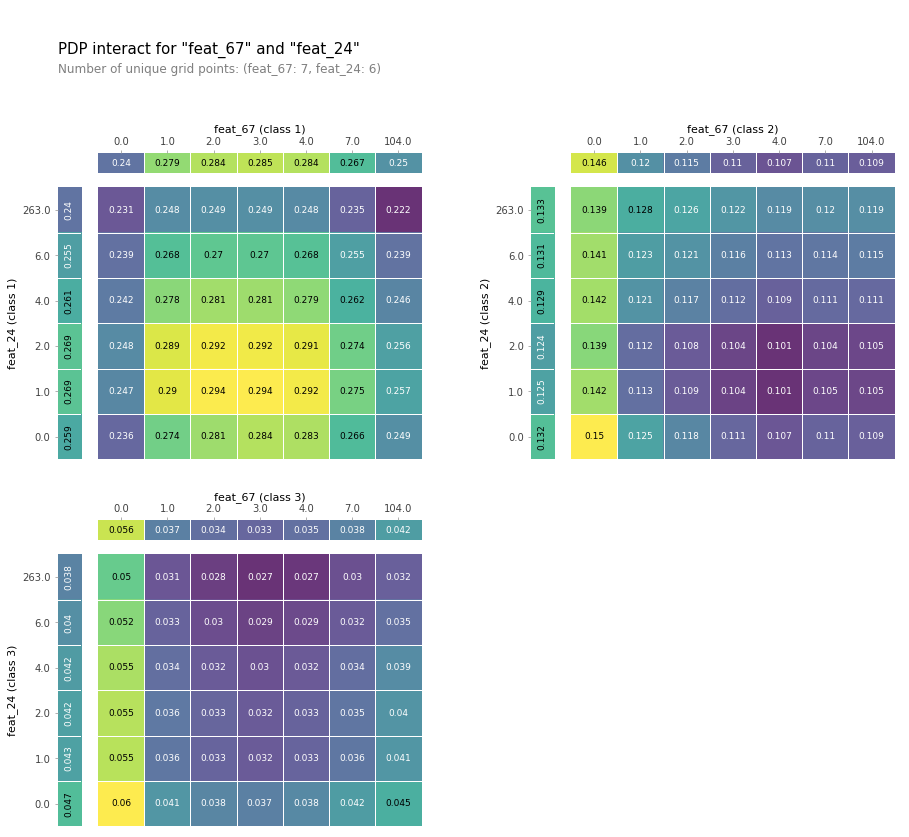

In [6]:
fig, axes = pdp.pdp_interact_plot(pdp_67_24_rf, ['feat_67', 'feat_24'], plot_type='grid',
                                  x_quantile=True, ncols=2, plot_pdp=True, which_classes=[1, 2, 3])

In [7]:
axes

{'pdp_inter_ax': [{'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f481ad08090>,
   'pdp_x_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f481acc3850>,
   'pdp_y_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f481aced310>},
  {'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f481abeec10>,
   'pdp_x_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f481ab3a510>,
   'pdp_y_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f481aafd7d0>},
  {'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f481a9f6790>,
   'pdp_x_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f481a9bb450>,
   'pdp_y_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f481a97cd90>}],
 'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f47f43f6110>}

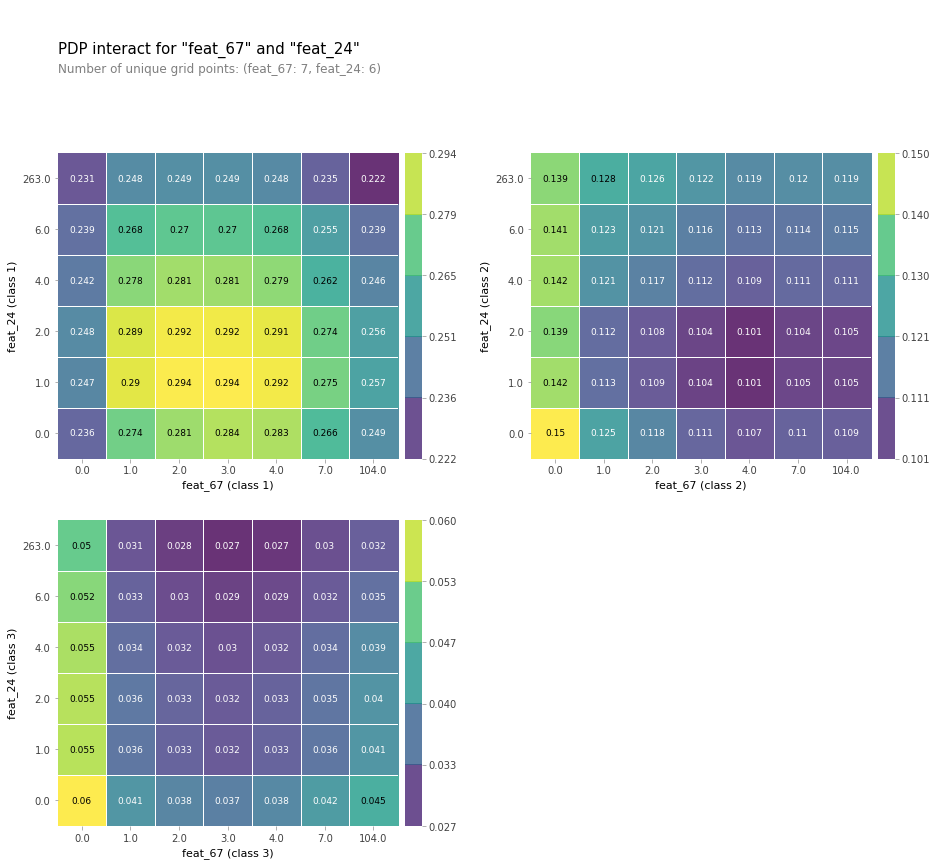

In [8]:
fig, axes = pdp.pdp_interact_plot(pdp_67_24_rf, ['feat_67', 'feat_24'], plot_type='grid',
                                  x_quantile=True, ncols=2, plot_pdp=False, which_classes=[1, 2, 3])

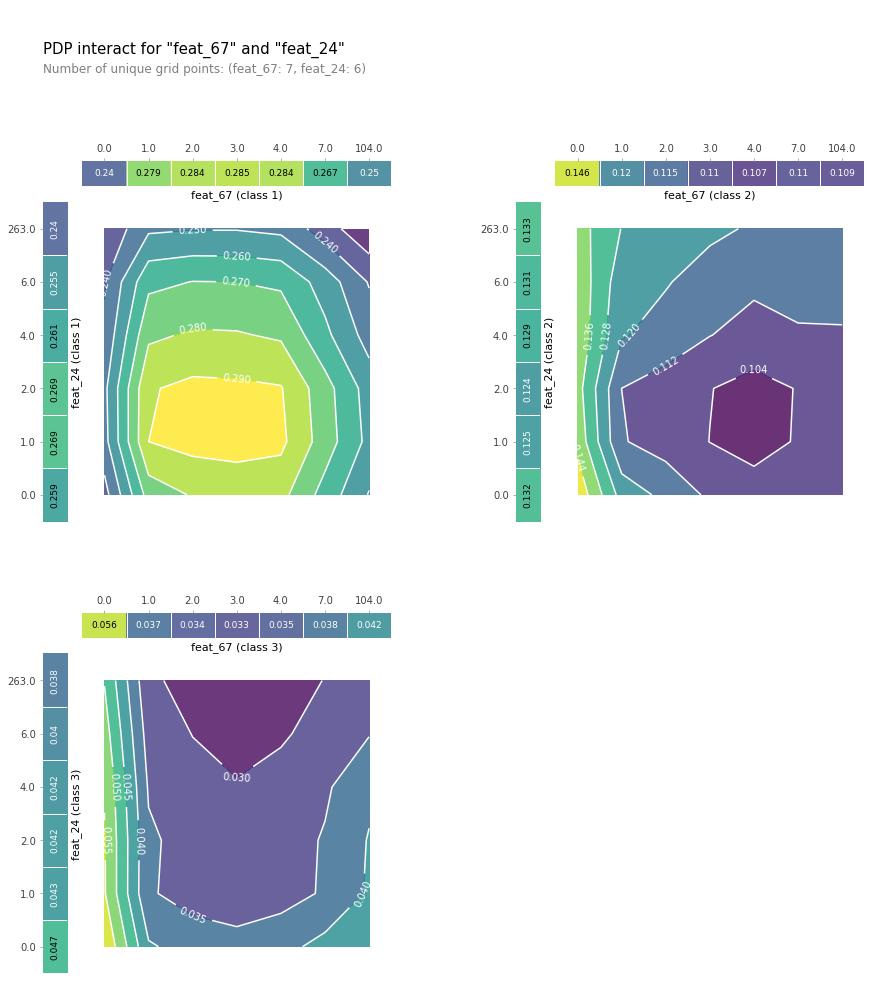

In [9]:
fig, axes = pdp.pdp_interact_plot(pdp_67_24_rf, ['feat_67', 'feat_24'], plot_type='contour',
                                  x_quantile=True, ncols=2, plot_pdp=True, which_classes=[1, 2, 3], 
                                  figsize=(15, 18))

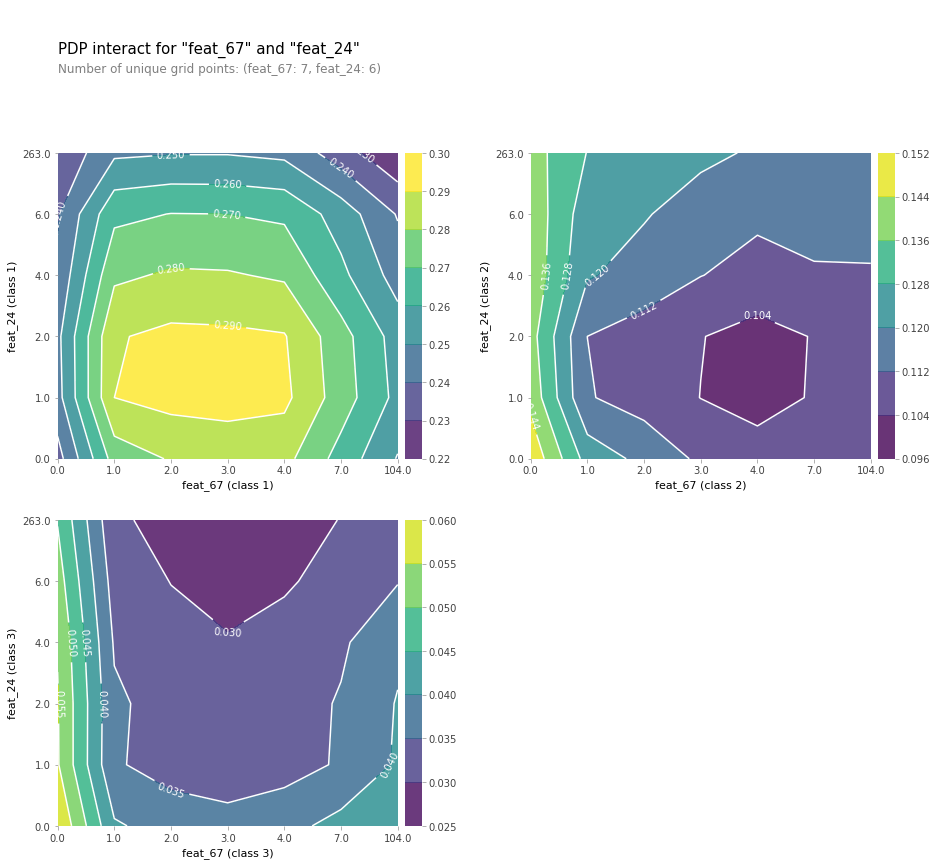

In [10]:
fig, axes = pdp.pdp_interact_plot(pdp_67_24_rf, ['feat_67', 'feat_24'], plot_type='contour',
                                  x_quantile=True, ncols=2, plot_pdp=False, which_classes=[1, 2, 3])